In [85]:
import csv
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def clean_data(picks):
    cleansed_picks = []
    for pick in picks:
        items = []
        items.append(pick[0].strip()) # absolute pick number
        items.append(pick[1].strip()) # round
        items.append(pick[2].strip()) # pick in round
        player_data = pick[-5:]
        items.append(player_data[1].strip() + " " + player_data[0].strip()) # first + last name
        items.append(player_data[2].strip()) # position
        items.append(player_data[3].strip()) # team
        items.append(player_data[4].strip()) # bye
        cleansed_picks.append(items)
    return cleansed_picks

# Read in all draft csvs
files = []
for file in os.listdir("drafts"):
    if file.endswith(".csv"):
        files.append(os.path.join("drafts", file))

print("Found " + str(len(files)) + " drafts to analyze")

drafts = []
for file in files:
    picks = []
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if (row[0] == "Overall Pick"):
                continue
            picks.append(row)
    cleansed_picks = clean_data(picks)
    drafts.append(cleansed_picks)

print("Finished parsing all drafts")

Found 148 drafts to analyze
Finished parsing all drafts


In [86]:
# Find adps for every player
player_adp = {}

for draft in drafts:
    for pick in draft:
        if (pick[4] != 'K'):
            player = pick[3]
            if player in player_adp:
                player_pick_nums = player_adp[player]
                player_pick_nums.append(pick[0])
            else:
                player_pick_nums = [pick[0]]
                player_adp[player] = player_pick_nums

In [96]:
df = pd.DataFrame()
df['Player'] = []
df['Pick'] = []

players_sorted_adp = {}

count = 50
skip = 0
for player in player_adp.keys():
    count = count - 1
    skip = skip + 1
    if skip < 0:
        continue
    if count <= 0:
        break
    player_picks = player_adp[player]
    player_picks = [int(x) for x in player_picks]
    avg_adp = sum(player_picks)/len(player_picks)
    players_sorted_adp[avg_adp] = player

all_adps_sorted = sorted(players_sorted_adp.keys())

rank = 1
for adp in all_adps_sorted:
    player = players_sorted_adp[adp]
    player_picks = player_adp[player]
    print(str(rank) + ". " + player + " " + str(adp))
    rank = rank + 1
    player_picks = [int(x) for x in player_picks]
    for pick in player_picks:
        df = df.append({'Player' : player, 'Pick' : pick}, ignore_index = True)

1. Christian McCaffrey 1.0337837837837838
2. Saquon Barkley 2.141891891891892
3. Ezekiel Elliott 3.168918918918919
4. Alvin Kamara 4.216216216216216
5. Michael Thomas 5.45945945945946
6. Dalvin Cook 6.614864864864865
7. Travis Kelce 8.114864864864865
8. Miles Sanders 8.736486486486486
9. Derrick Henry 8.871621621621621
10. Davante Adams 11.445945945945946
11. Joe Mixon 11.70945945945946
12. George Kittle 12.945945945945946
13. Kenyan Drake 13.054054054054054
14. Tyreek Hill 15.39864864864865
15. Josh Jacobs 15.75
16. Clyde Edwards-Helaire 15.783783783783784
17. Julio Jones 17.14189189189189
18. Nick Chubb 17.736486486486488
19. DeAndre Hopkins 17.993243243243242
20. Austin Ekeler 18.10135135135135
21. Aaron Jones 19.52027027027027
22. Chris Godwin 21.66891891891892
23. Lamar Jackson 25.45945945945946
24. Patrick Mahomes 25.824324324324323
25. Kenny Golladay 28.16891891891892
26. Mark Andrews 28.18918918918919
27. Todd Gurley 28.2027027027027
28. James Conner 28.64864864864865
29. Allen

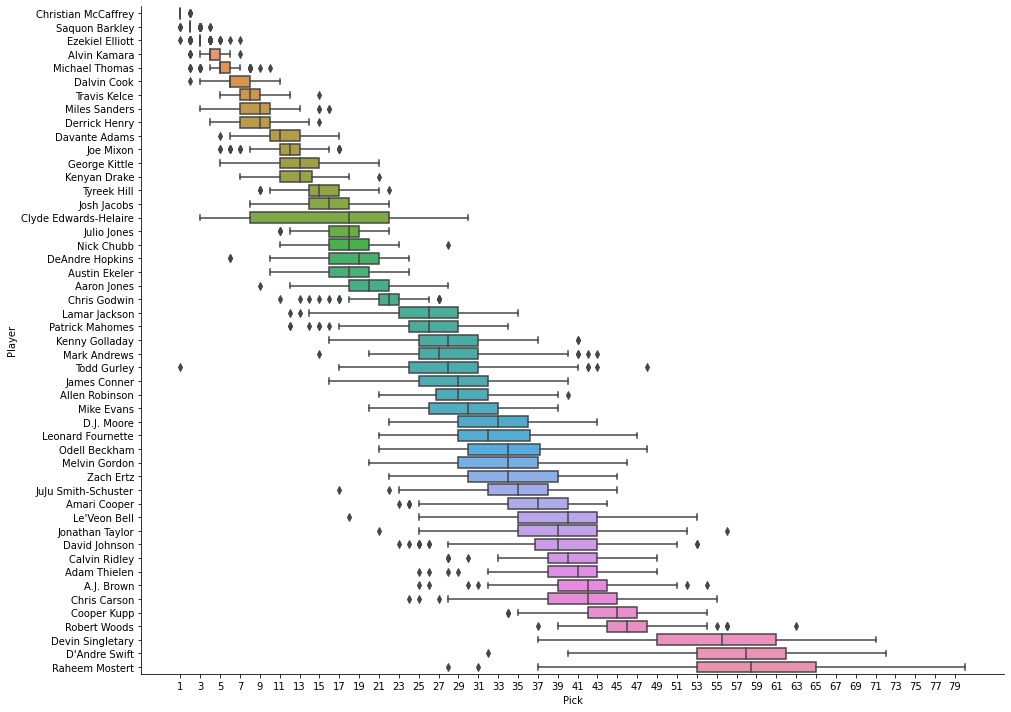

In [93]:
boxplot = sns.catplot(x="Pick", y="Player", kind="box", data=df, orient='h', height=10, aspect=11.7/8.27);
boxplot.set(xticks=[i for i in range(int(min(df['Pick'])), int(max(df['Pick'])) + 1, 2)])

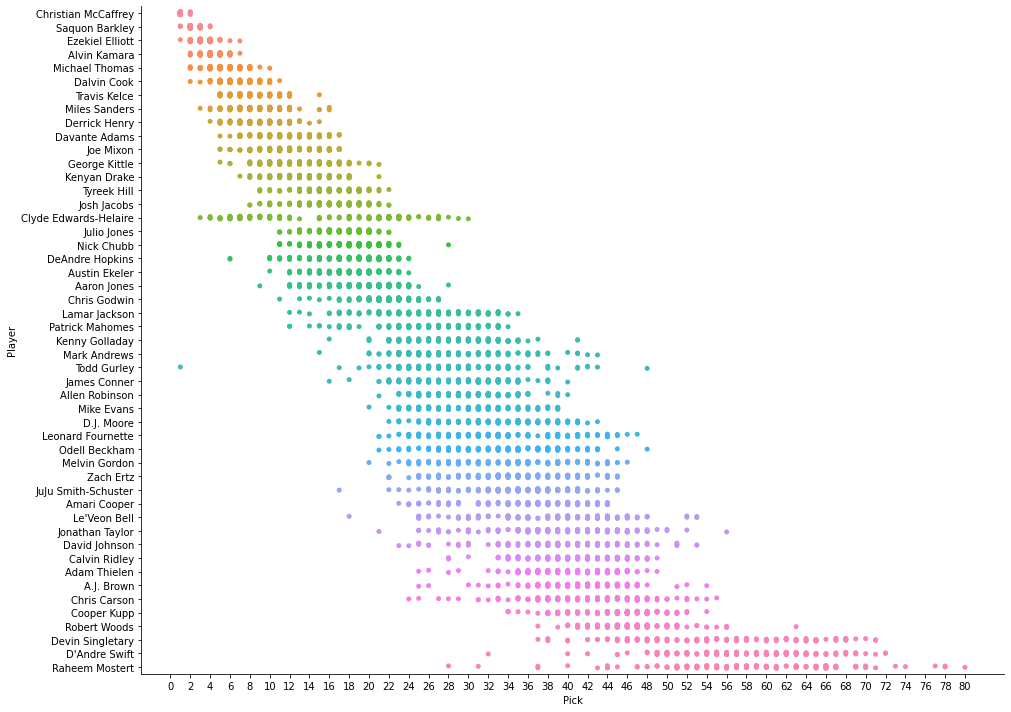

In [94]:
scatterplot = sns.catplot(x="Pick", y="Player", data=df, height=10, aspect=11.7/8.27);
scatterplot.set(xticks=[i for i in range(0, int(max(df['Pick'])) + 1, 2)])

In [193]:
#fig, ax = plt.subplots(figsize=(14,8))
#sns.swarmplot(x="Pick", y="Player", data=df, ax=ax)